In [2]:
%time
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10 µs


In [3]:
df = pd.read_csv('16APR2020.csv')

In [4]:
df = df.drop('Unnamed: 0', axis = 1)

In [5]:
sp = df.groupby('strikePrice')

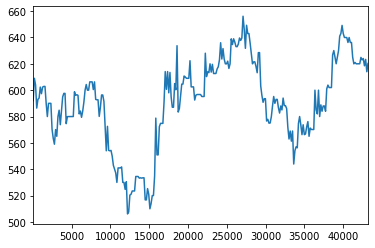

In [6]:
sp.get_group(8500.0)['LTP_CE'].plot(kind='line')

In [7]:
%time
pcr = []
max_oi_ce = []
max_oi_pe = []
max_change_oi_ce = []
max_change_oi_pe = []
position_closing = {"call":[], "put":[]}
long_unwinding = {'call':[], "put":[]}
j = 0

def str_clean(item):
    pattern = re.compile('[0-9\.]*\s')
    new = [x.replace('\nName: strikePrice, dtype: float64','') for x in item]
    new = [re.sub(pattern,'',x) for x in new]
    new = [x.split('-') for x in new]
    return pd.DataFrame(new)

for i in range(0, 285):
    dff = df.loc[j:j+152]
    pcr.append(dff['Volume_PE'].sum()/dff['Volume_CE'].sum())
    
    strike = dff[dff['OI_CE'] == max(dff['OI_CE'])]['strikePrice']
    oi = max(dff['OI_CE'])
    max_oi_ce.append(str(strike)+'-'+str(oi))
    
    strike = dff[dff['OI_PE'] == max(dff['OI_PE'])]['strikePrice']
    oi = max(dff['OI_PE'])
    max_oi_pe.append(str(strike)+'-'+str(oi))
    
    strike = dff[dff['changeOI_CE'] == max(dff['changeOI_CE'])]['strikePrice']
    oi = max(dff['changeOI_CE'])
    max_change_oi_ce.append(str(strike)+'-'+str(oi))
    
    strike = float(dff[dff['changeOI_PE'] == max(dff['changeOI_PE'])]['strikePrice'])
    oi = max(dff['changeOI_PE'])
    max_change_oi_pe.append(str(strike)+'-'+str(oi))
    
    position_closing['call'].append(dff[dff["changeOI_CE"]<0])
    position_closing['put'].append(dff[dff["changeOI_PE"]<0])
    long_unwinding['call'].append(dff[(dff["changeOI_CE"]<0) & (dff['LTP_CE']<0)])
    long_unwinding['put'].append(dff[(dff["changeOI_PE"]<0) & (dff['LTP_PE']<0)])
    
    j+=152

max_oi_ce = str_clean(max_oi_ce)
max_oi_pe = str_clean(max_oi_pe)
max_change_oi_ce = str_clean(max_change_oi_ce)
max_change_oi_pe = str_clean(max_change_oi_pe)
pcr = pd.DataFrame(pcr)
max_val = pd.concat([max_oi_ce,max_oi_pe,max_change_oi_ce, max_change_oi_pe, pcr], axis = 1)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.78 µs


In [8]:
max_val.columns = ['sp_oi_ce','max_OI_CE','sp_oi_pe','max_OI_PE','sp_chg_ce','max_change_OI_CE','sp_chg_pe','max_change_oi_pe', 'PCR']
max_val = max_val.reset_index()
max_val = max_val.astype(float)

In [9]:
max_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
index               285 non-null float64
sp_oi_ce            285 non-null float64
max_OI_CE           285 non-null float64
sp_oi_pe            285 non-null float64
max_OI_PE           285 non-null float64
sp_chg_ce           285 non-null float64
max_change_OI_CE    285 non-null float64
sp_chg_pe           285 non-null float64
max_change_oi_pe    285 non-null float64
PCR                 285 non-null float64
dtypes: float64(10)
memory usage: 22.4 KB


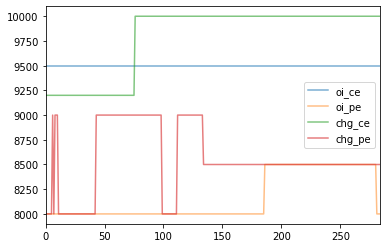

In [10]:
max_val.sp_oi_ce.plot(label = 'oi_ce',alpha=0.6)
max_val.sp_oi_pe.plot(label = 'oi_pe',alpha=0.5)
max_val.sp_chg_ce.plot(label = 'chg_ce',alpha=0.6)
max_val.sp_chg_pe.plot(label = 'chg_pe',alpha=0.6)
plt.legend()

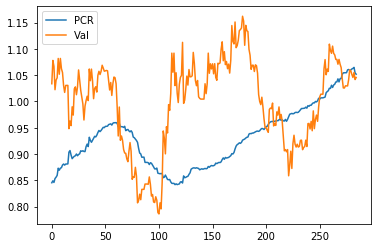

In [13]:
plt.plot(pcr,label = 'PCR')
plt.plot(val, label = 'Val')
plt.legend()

In [86]:
pcr = list(max_val.PCR/max_val.PCR.mean())

In [12]:
val = list(sp.get_group(9000.0)['LTP_CE']/sp.get_group(9000.0)['LTP_CE'].mean())

In [14]:
max_val.PCR

0      0.845244
1      0.848927
2      0.845860
3      0.853197
4      0.855868
         ...   
280    1.061756
281    1.062785
282    1.064784
283    1.054141
284    1.051773
Name: PCR, Length: 285, dtype: float64

In [15]:
dff = df[-152:-1]

In [17]:
x = dff[(dff['strikePrice']>9128) & (dff['strikePrice']<9628)]['LTP_CE']

In [19]:
y = x/(dff[(dff['strikePrice']>9128) & (dff['strikePrice']<9628)]['strikePrice'] - 9128)

In [21]:
y.mean()

1.401034174233279

In [27]:
li = []
j = 0
for i in range(0, 285):
    dff = df.loc[j:j+152]
    x = dff[(dff['strikePrice']>9128) & (dff['strikePrice']<9628)]['LTP_CE']
    y = x/(dff[(dff['strikePrice']>9128) & (dff['strikePrice']<9628)]['strikePrice'] - 9128)
    li.append(y.mean())
    j+=152

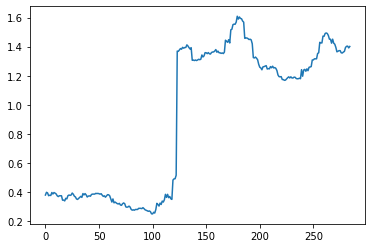